# Task 2: Diffusion Maps

## Imports 

Some needed libraries and code files 

In [1]:
import numpy as np
import scipy as sc
import math
import matplotlib.pyplot as plt
import datafold.dynfold as dfold
import datafold.pcfold as pfold
import pandas as pd
import seaborn as sns
from DiffusionMaps import Diffusion_Map
from sklearn.datasets import make_swiss_roll
from datafold.utils.plot import plot_pairwise_eigenvector
from datafold.dynfold import LocalRegressionSelection

## Part 1

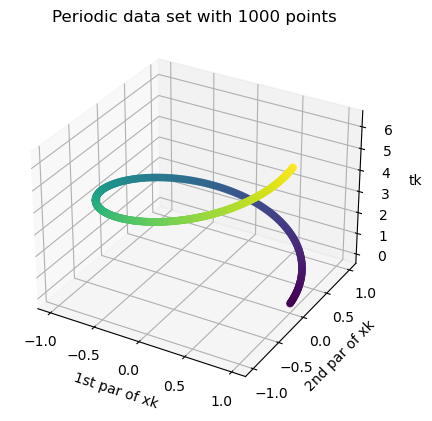

In [2]:
#periodic data set with N = 1000 points
N = 1000
k = np.array(np.arange(0, N))
tk = (2 * math.pi * k) / (N + 1)
xk = np.array([np.cos(tk), np.sin(tk)])
xk = xk.T

#plot of the data set
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xk[:, 0], xk[:, 1], tk, c=tk)
ax.set_title("Periodic data set with 1000 points")
ax.set_xlabel('1st par of xk')
ax.set_ylabel('2nd par of xk')
ax.set_zlabel('tk')
plt.show()
fig.savefig("Dataset.png")

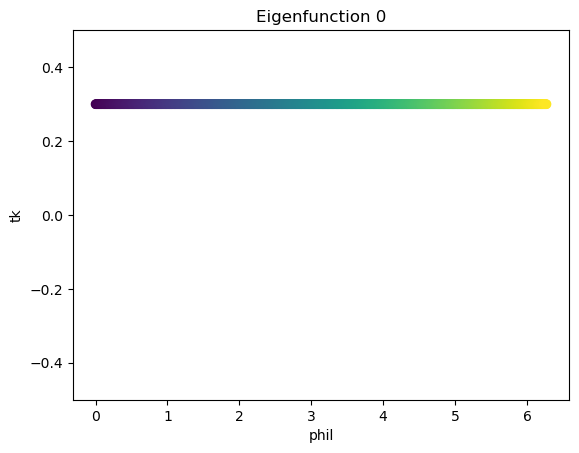

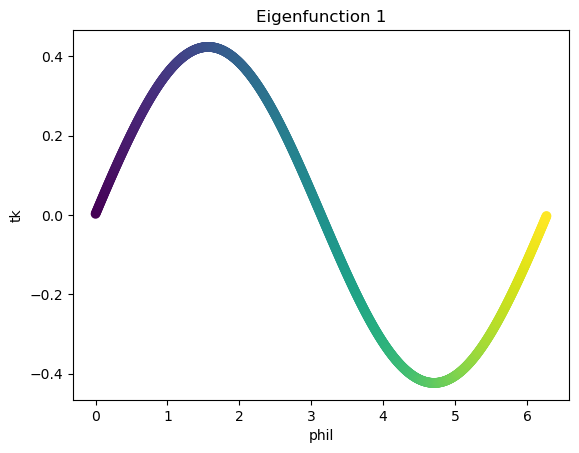

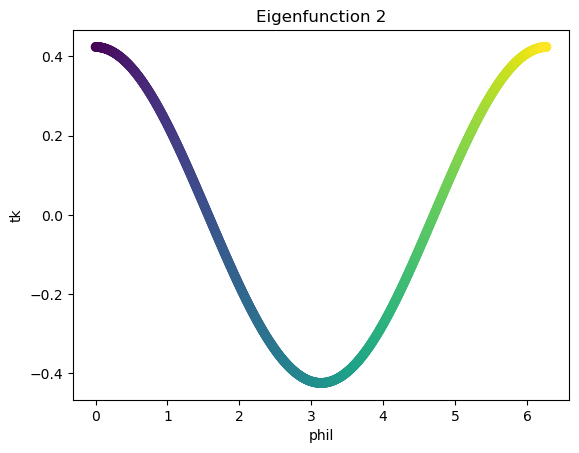

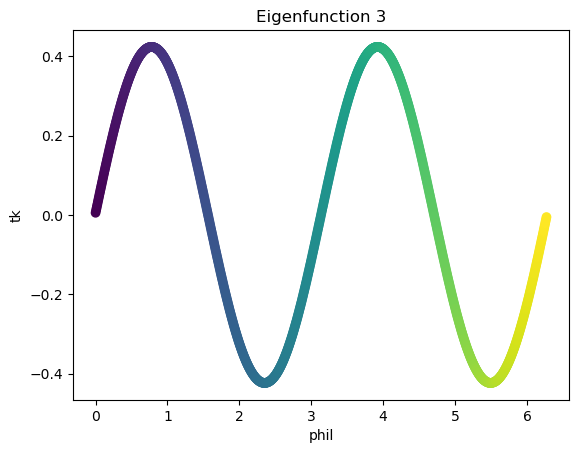

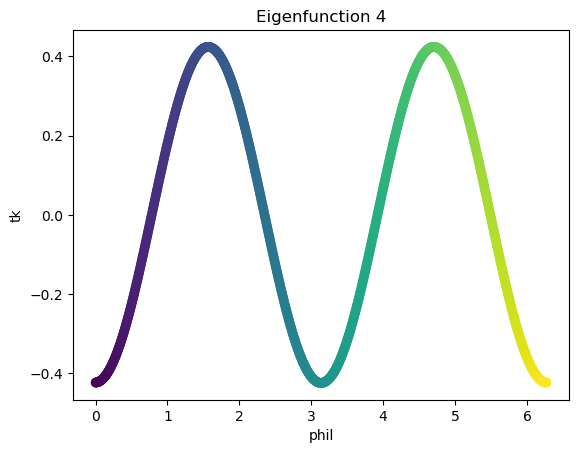

In [3]:
L = 4
#applied the Diffusion Map algorithm to obtain 5 (L + 1) eigenfunctions
phil, alphal = Diffusion_Map(xk, L)

#plotted the eigenfunctions against tk
for i in range(phil.shape[1]):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(tk, phil[:, i], c=tk)
    ax.set_title("Eigenfunction " +str(i))
    ax.set_xlabel('phil')
    ax.set_ylabel('tk')
    if i == 0:
        ax.set_ylim([-0.5, 0.5])
    fig.savefig("plot" +str(i)+ ".png")
    plt.show()

## Part 2

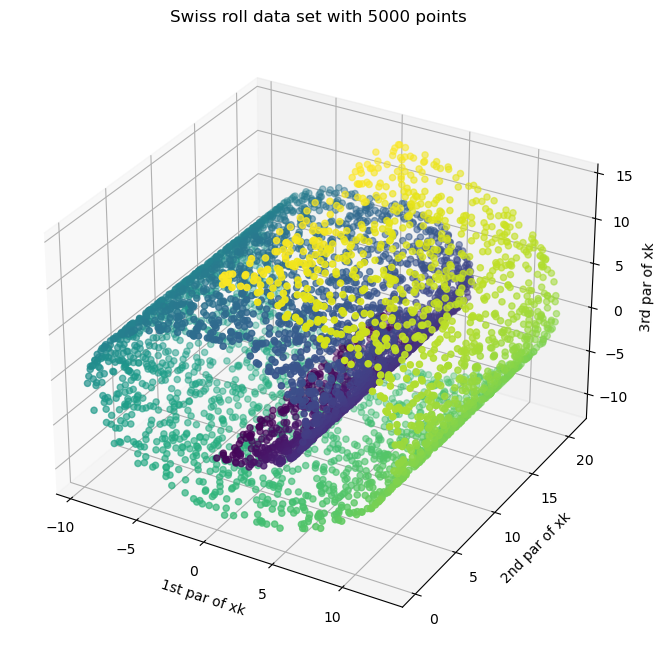

In [4]:
#Swiss roll data set with 5000 data points with no additional noise
xk, tk = make_swiss_roll(n_samples = 5000, noise = 0.0)

#plot of the Swiss roll data set
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xk[:, 0], xk[:, 1], xk[:, 2], c=tk)
ax.set_title("Swiss roll data set with 5000 points")
ax.set_xlabel('1st par of xk')
ax.set_ylabel('2nd par of xk')
ax.set_zlabel('3rd par of xk')
plt.show()
fig.savefig("Swiss_roll_data_set.png")

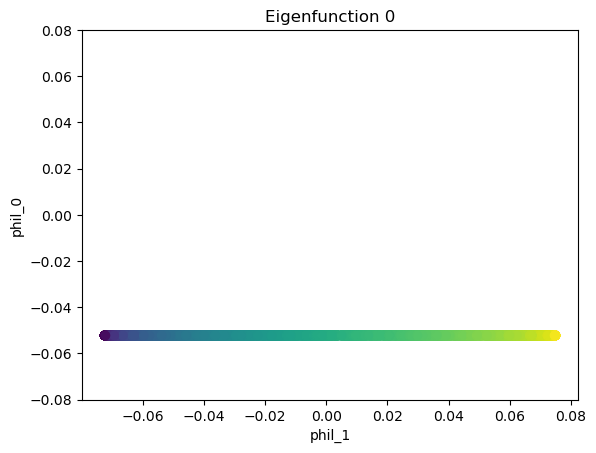

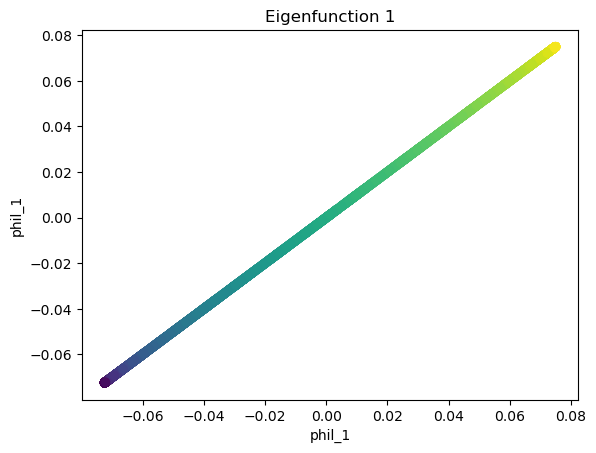

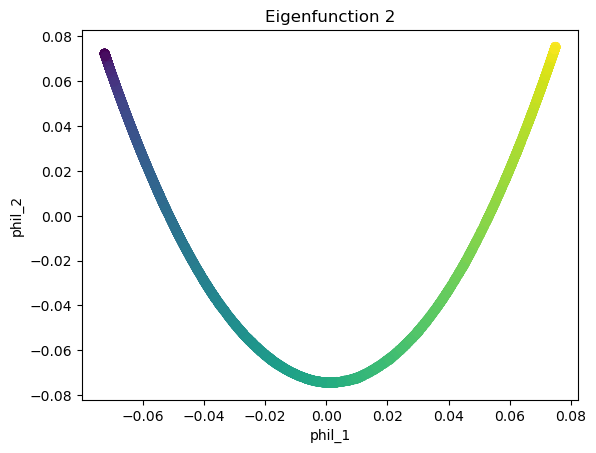

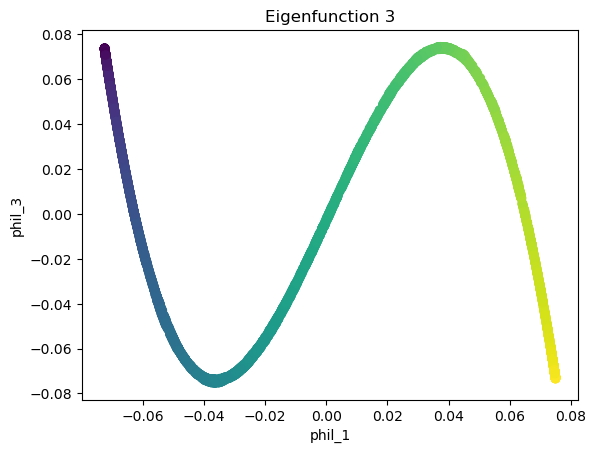

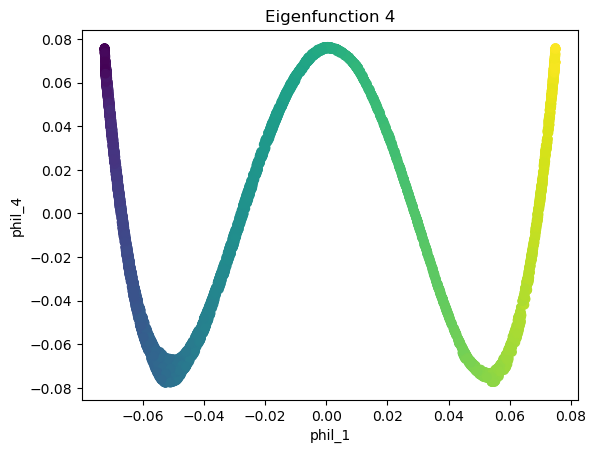

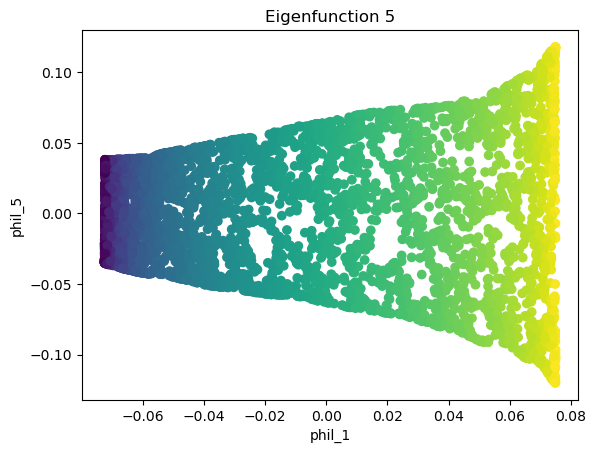

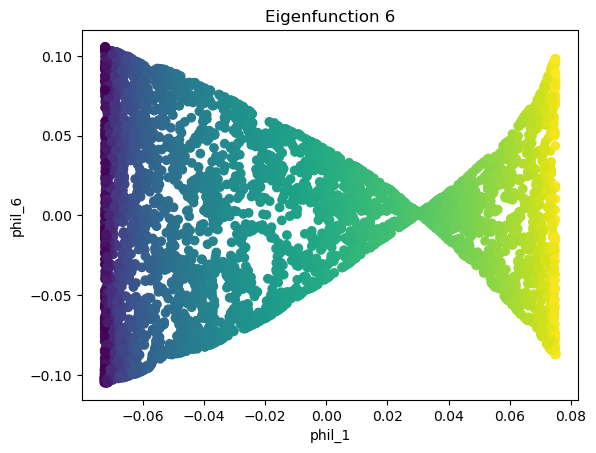

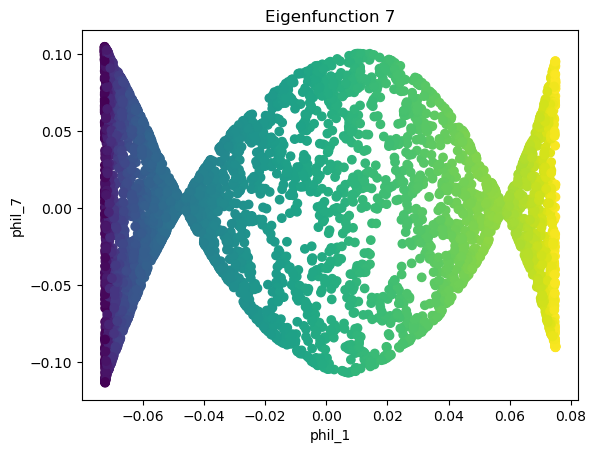

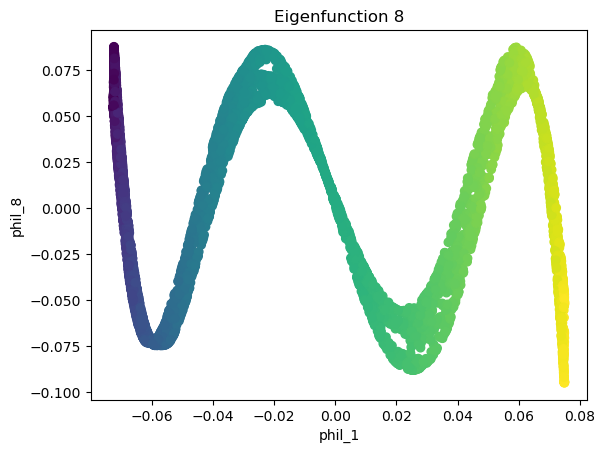

Found parsimonious eigenvectors (indices): [1 5]


In [5]:
L = 9
#applied the Diffusion Map algorithm to obtain 10 (L + 1) eigenfunctions 
phil, alphal = Diffusion_Map(xk, L)

#plotted the eigenfunctions against phi_1
for i in range(phil.shape[1]):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(phil[:, 1], phil[:, i], c=tk)
    ax.set_title("Eigenfunction " +str(i))
    ax.set_ylabel("phil_"+str(i))
    ax.set_xlabel("phil_1")
    if i == 0:
        ax.set_ylim([-0.08, 0.08])
    fig.savefig("Swiss_plot" +str(i)+ ".png")
    plt.show()

#use of the Local Regression Selection method
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=5000, strategy="dim"
).fit(phil)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")


Principal Component 1:  [-0.33322802  0.72954021 -0.59726892]
Principal Component 2:  [0.34291642 0.68386793 0.64399766]
Principal Component 3:  [ 0.87827525  0.00978474 -0.47805528]


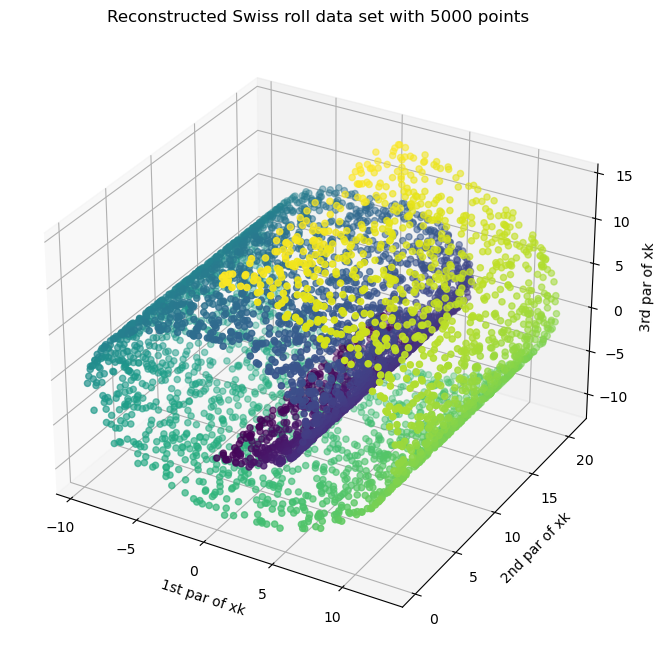

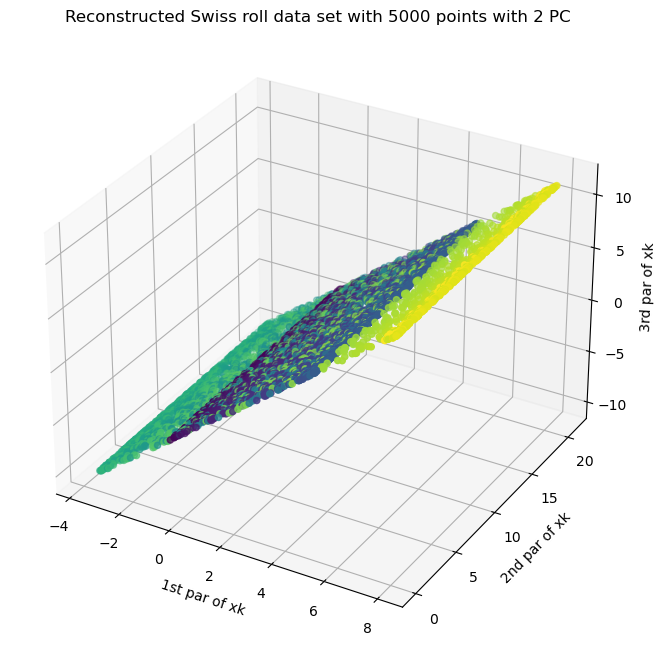

In [6]:
#Finding the three principal components
data_avg = np.average(xk)
data_bar = xk - data_avg
U, S, Vt = np.linalg.svd(data_bar)
m, n = xk.shape

c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c3 = Vt.T[:, 2]
print("Principal Component 1: ", c1)
print("Principal Component 2: ", c2)
print("Principal Component 3: ", c3)

#reconstruction and plot of the data set
fig = plt.figure(figsize=(8,8))
reconstruction = U[:,:n] @ np.diag(S) @ Vt[:m,:] + data_avg
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=tk)
ax.set_title("Reconstructed Swiss roll data set with 5000 points")
ax.set_xlabel('1st par of xk')
ax.set_ylabel('2nd par of xk')
ax.set_zlabel('3rd par of xk')
plt.show()

#removing the third component of the vector Vt
S_d = S.copy()
S_d[2] = 0

#reconstruction and plot of the data set
fig = plt.figure(figsize=(8,8))
reconstruction = U[:,:n] @ np.diag(S_d) @ Vt[:m,:] + data_avg
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=tk)
ax.set_title("Reconstructed Swiss roll data set with 5000 points with 2 PC")
ax.set_xlabel('1st par of xk')
ax.set_ylabel('2nd par of xk')
ax.set_zlabel('3rd par of xk')
plt.show()
fig.savefig("Swiss_plot_2_PC.png")

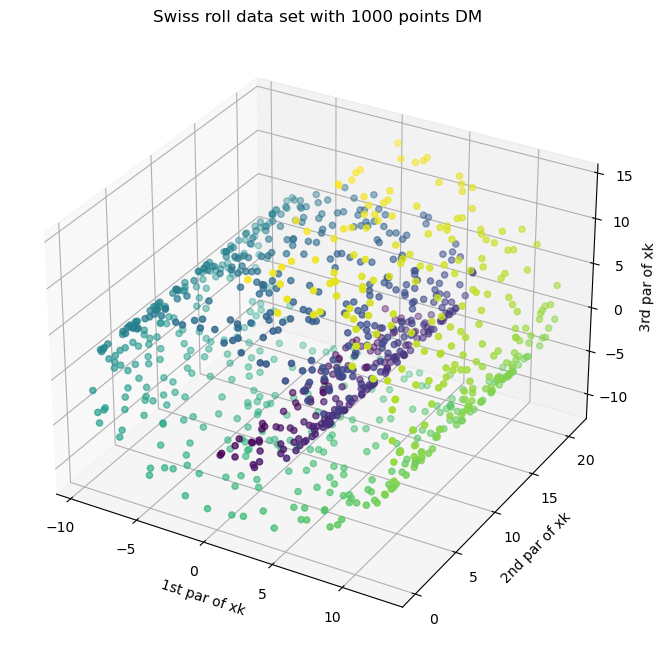

In [7]:
#swiss roll data set with 1000 data points with no additional noise
xk, tk = make_swiss_roll(n_samples = 1000, noise = 0.0)

#plot of the swiss roll data set with 1000 points
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xk[:, 0], xk[:, 1], xk[:, 2], c=tk)
ax.set_title("Swiss roll data set with 1000 points DM")
ax.set_xlabel('1st par of xk')
ax.set_ylabel('2nd par of xk')
ax.set_zlabel('3rd par of xk')
plt.show()
fig.savefig("Swiss_roll_1000_data_set.png")

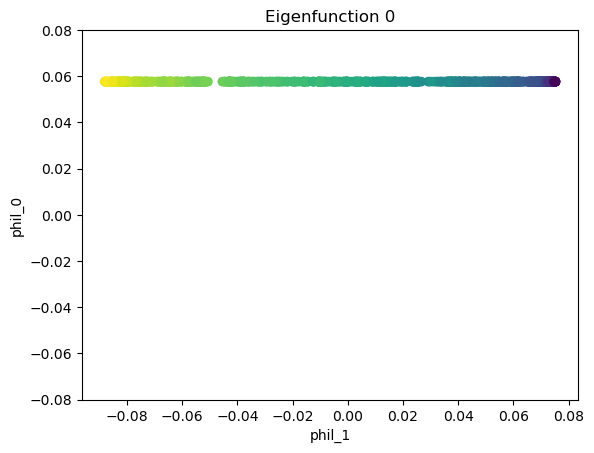

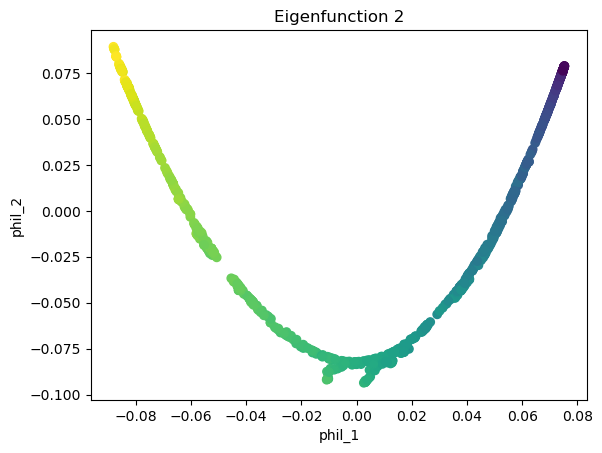

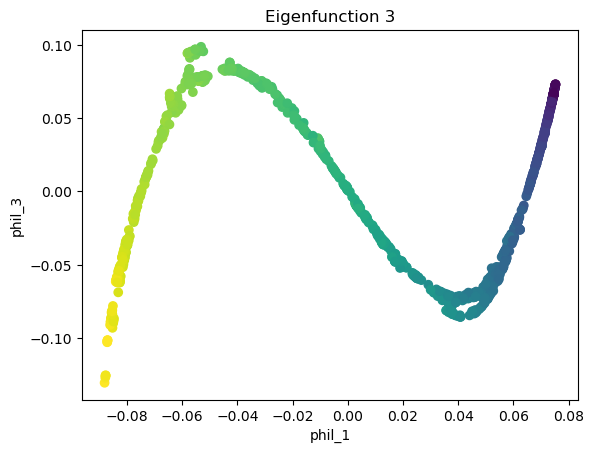

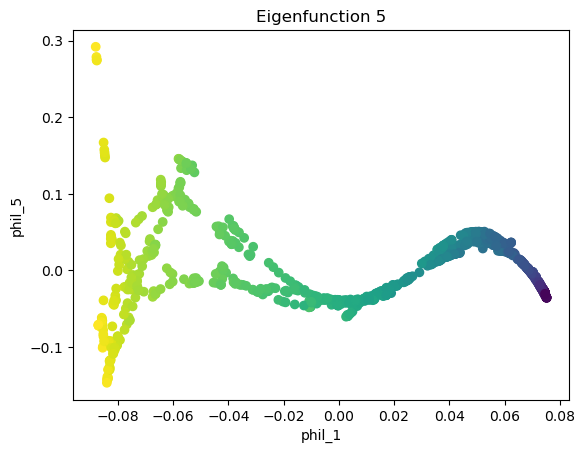

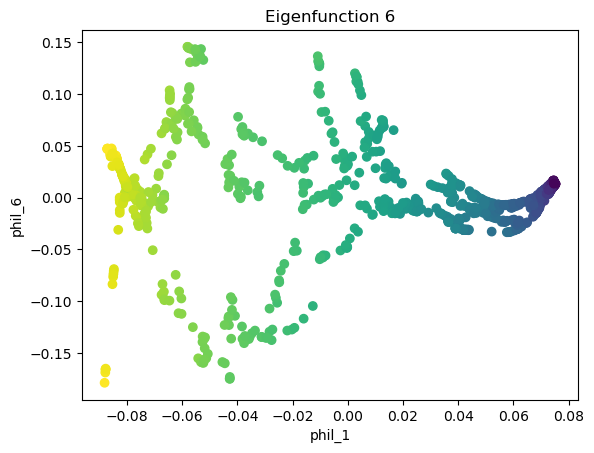

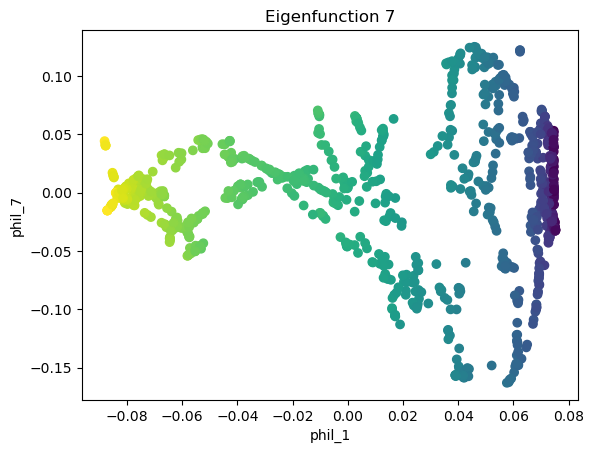

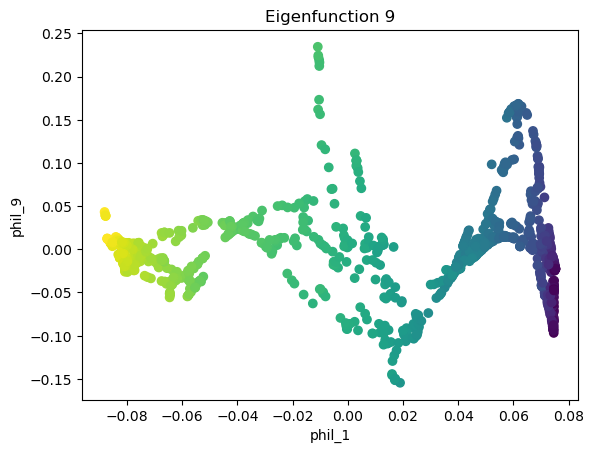

In [8]:
L = 9
phil, alphal = Diffusion_Map(xk, L)

#plotted the eigenfunctions against phi_1
for i in range(phil.shape[1]):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(phil[:, 1], phil[:, i], c=tk)
    ax.set_title("Eigenfunction " +str(i))
    ax.set_ylabel("phil_"+str(i))
    ax.set_xlabel("phil_1")
    if i == 0:
        ax.set_ylim([-0.08, 0.08])
    fig.savefig("Swiss_plot_1000" +str(i)+ ".png")
    plt.show()

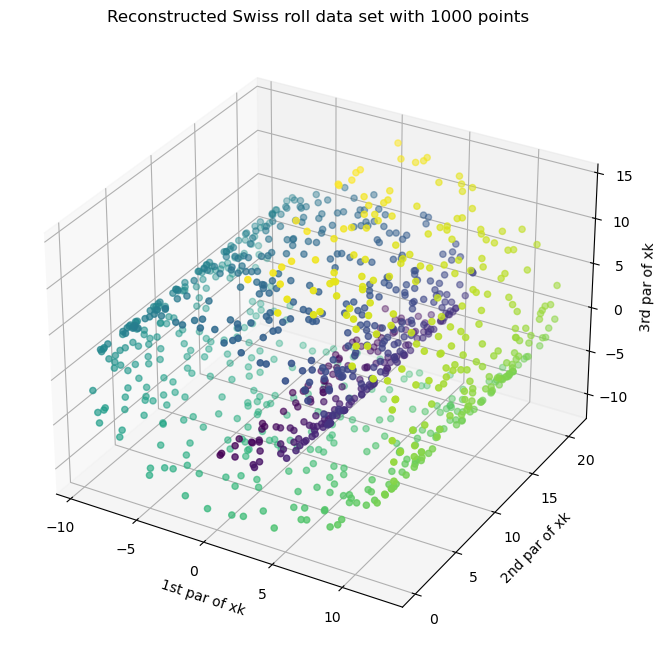

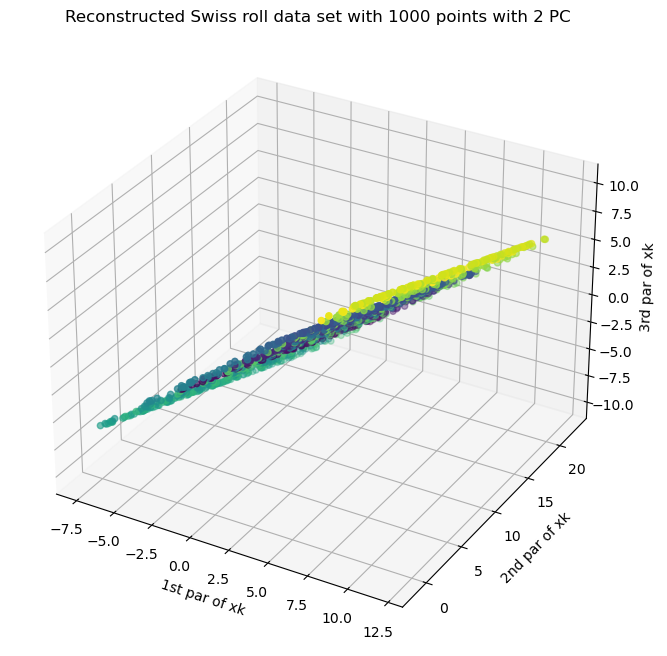

In [9]:
#Finding the three principal components
data_avg = np.average(xk)
data_bar = xk - data_avg
U, S, Vt = np.linalg.svd(data_bar)
m, n = xk.shape

#reconstruction and plot of the data set
fig = plt.figure(figsize=(8,8))
reconstruction = U[:,:n] @ np.diag(S) @ Vt[:m,:] + data_avg
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=tk)
ax.set_title("Reconstructed Swiss roll data set with 1000 points")
ax.set_xlabel('1st par of xk')
ax.set_ylabel('2nd par of xk')
ax.set_zlabel('3rd par of xk')
plt.show()

#removing the third component of the vector Vt
S_d = S.copy()
S_d[2] = 0

#reconstruction and plot of the data set
fig = plt.figure(figsize=(8,8))
reconstruction = U[:,:n] @ np.diag(S_d) @ Vt[:m,:] + data_avg
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstruction[:, 0], reconstruction[:, 1], reconstruction[:, 2], c=tk)
ax.set_title("Reconstructed Swiss roll data set with 1000 points with 2 PC")
ax.set_xlabel('1st par of xk')
ax.set_ylabel('2nd par of xk')
ax.set_zlabel('3rd par of xk')
plt.show()
fig.savefig("Swiss_plot_2_PC_1000.png")

## BONUS

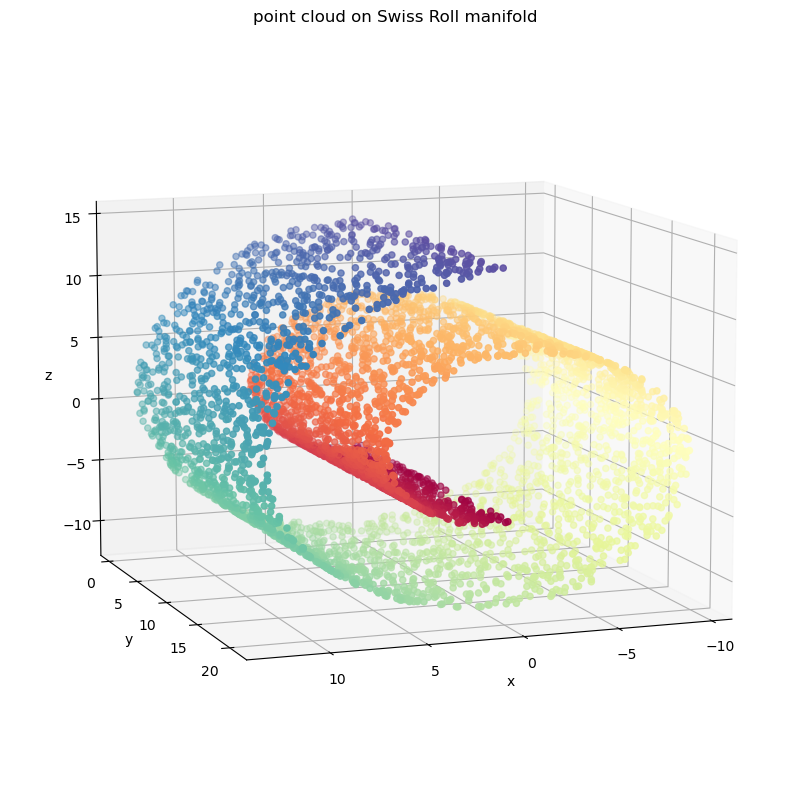

In [10]:
#datafold software
nr_samples = 15000

# reduce number of points for plotting
nr_samples_plot = 5000
idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on Swiss Roll manifold")
ax.view_init(10, 70)

fig.savefig("Swiss_plot_datafold.png")

In [11]:
#optimize the kernel parameters
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.16666890205593393, cut-off=1.7521856735852583


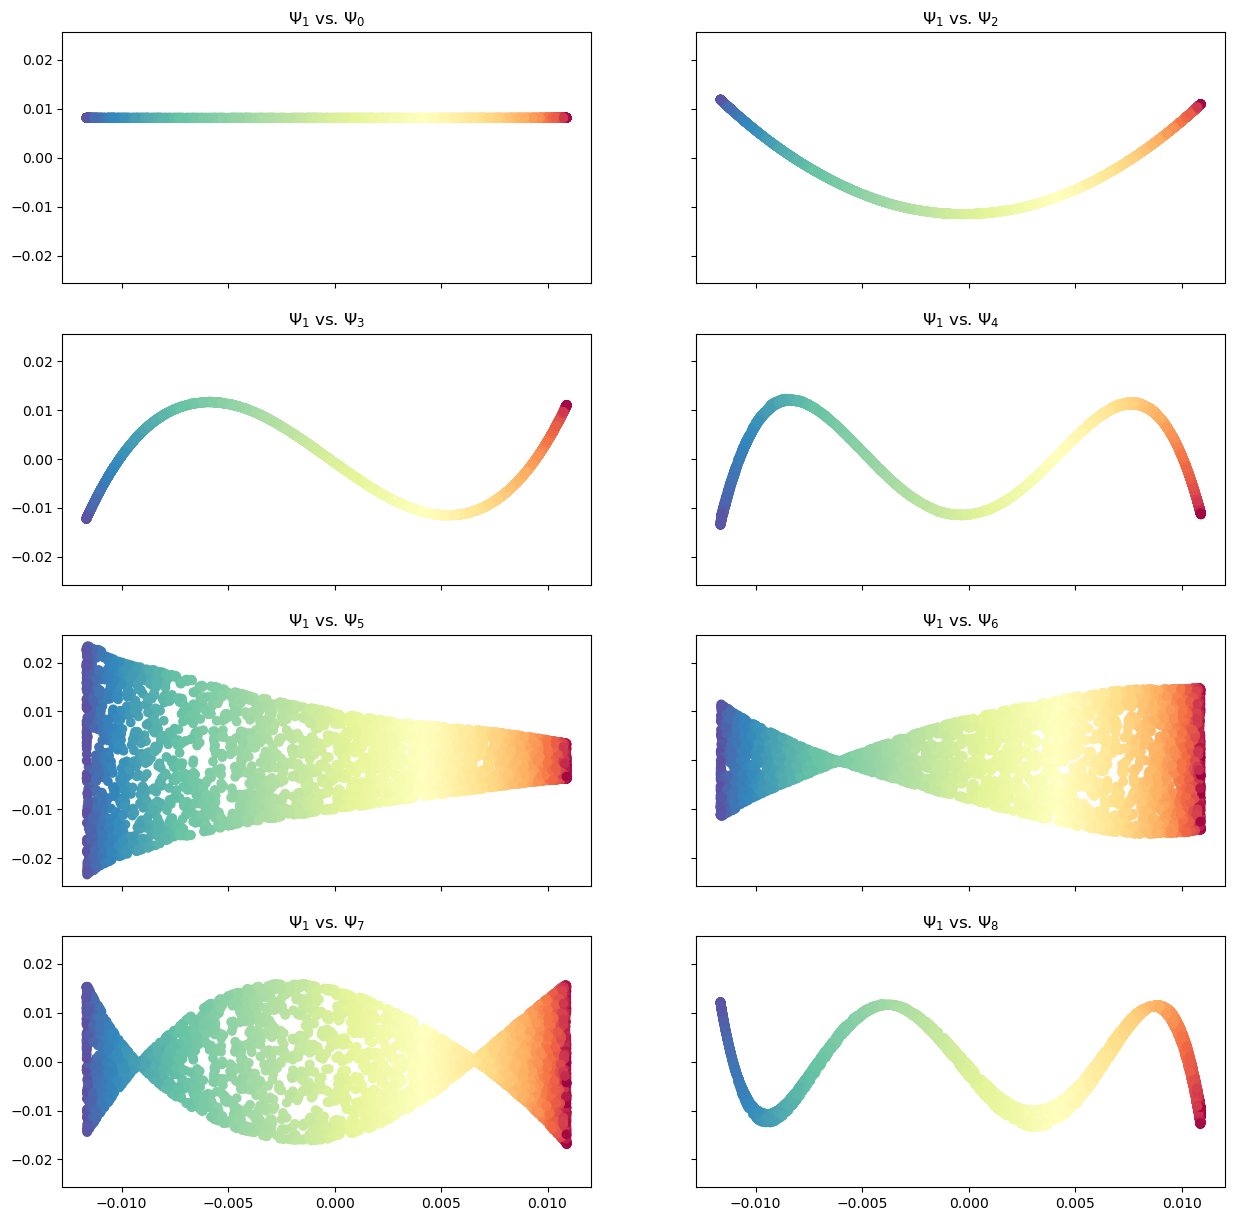

In [12]:
#appliying the Diffusion Maps algorithm
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

#plotting the eigenfunctions against phi_1
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

In [13]:
#appliying the Local Regression Selection method
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


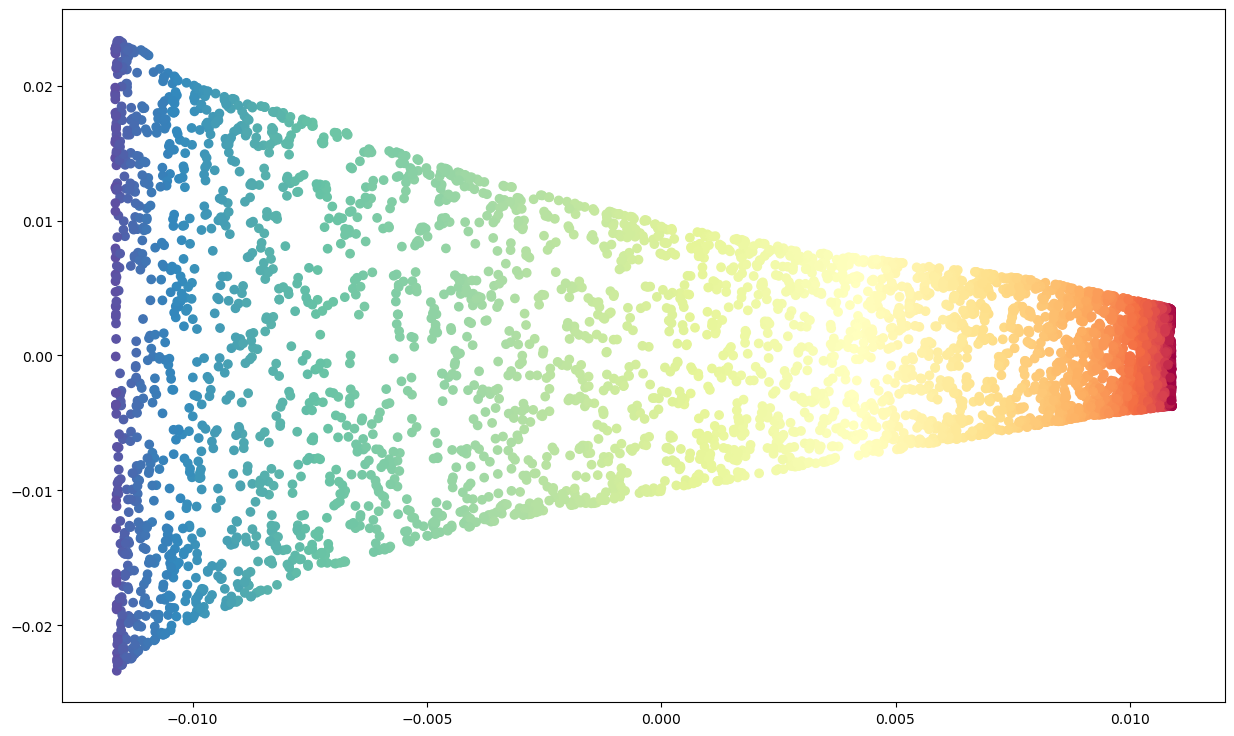

In [14]:
#finding and plotting the unfold point cloud
target_mapping = selection.transform(dmap.eigenvectors_)

f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
);

## Part 3

In [15]:
#loading the data from the data_DMAP_PCA_vadere.txt
data = np.loadtxt("data_DMAP_PCA_vadere.txt")
data

array([[ 7.6827459 , 16.59013494, 13.48382465, ..., 17.09617936,
         5.90601637, 15.32255011],
       [ 8.14553521, 16.64840919, 13.27720784, ..., 17.30546241,
         5.82218956, 15.6793479 ],
       [ 7.88737011, 16.50898935, 13.48175464, ..., 17.3706356 ,
         5.5529421 , 15.40945667],
       ...,
       [ 7.56327374, 16.56342874, 13.47112439, ..., 17.51669123,
         5.82033135, 15.00305901],
       [ 7.60883052, 16.69175708, 13.48771297, ..., 17.38731823,
         5.84139515, 15.47157135],
       [ 8.19347288, 16.4834869 , 13.08424811, ..., 17.68207928,
         5.90600029, 15.44180975]])

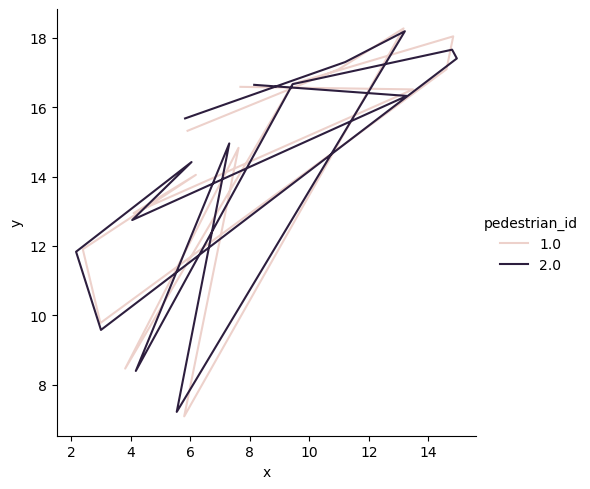

In [16]:
#plotting the path of the first two pedestrians in 2D space
def task_1_part_3_plot(data):
    data_records = {"pedestrian_id":[], "x":[], "y":[], "time":[]}
    data_records = pd.DataFrame(data_records)
    pedestrian_id = 0
    pedestrian_number = 2

    for record in data[:pedestrian_number]:
        pedestrian_id += 1
        tmp_x = 0
        for position in range(record.size):
            if position % 2:
                tmp_y = record[position]
                time = position // 2
                data_records.loc[len(data_records.index)] = [pedestrian_id, tmp_x, tmp_y, time]
            else:
                tmp_x = record[position]

    sns.relplot(
        data=data_records, kind="line",
        x="x", y="y", hue="pedestrian_id",
        sort=False
    )
task_1_part_3_plot(data)

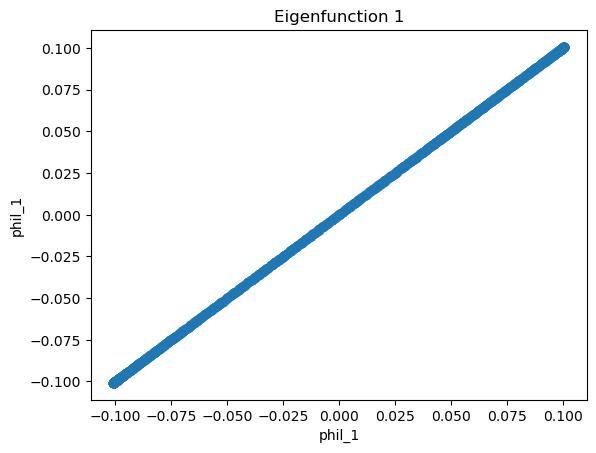

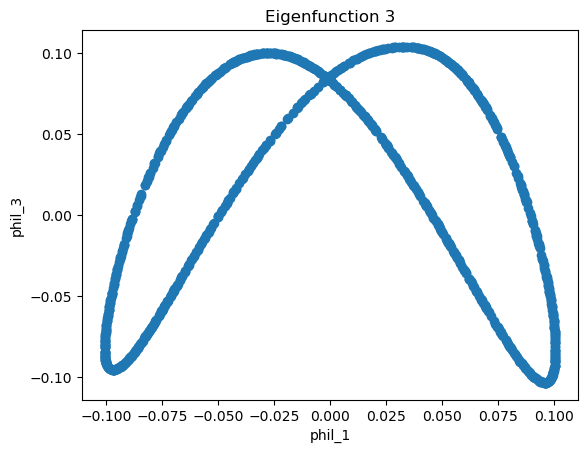

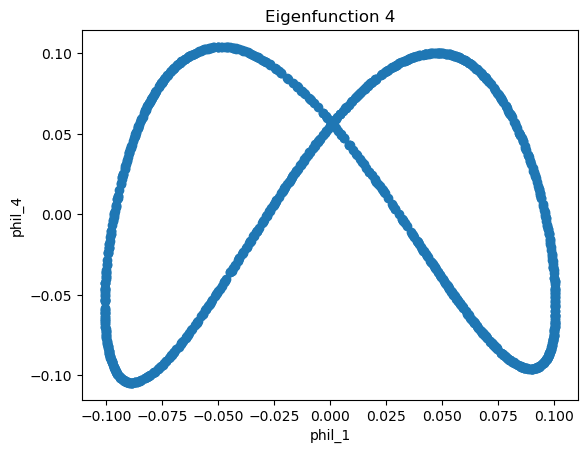

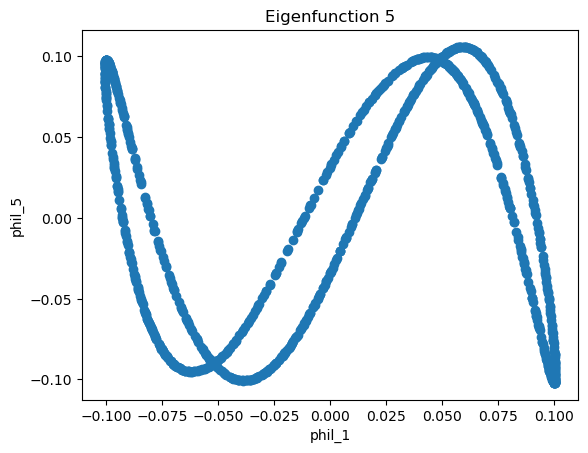

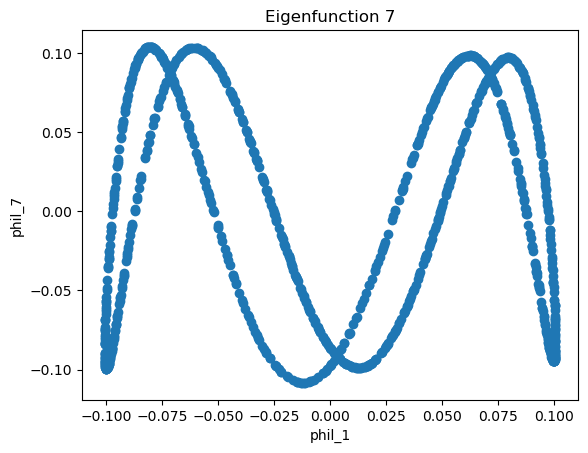

In [17]:
L = 7
#applied the Diffusion Map algorithm to obtain 10 (L + 1) eigenfunctions 
phil, alphal = Diffusion_Map(data, L)

#plotted the eigenfunctions against phi_1
for i in range(phil.shape[1]):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(phil[:, 1], phil[:, i])
    ax.set_title("Eigenfunction " +str(i))
    ax.set_ylabel("phil_"+str(i))
    ax.set_xlabel("phil_1")
    if i == 0:
        ax.set_ylim([-0.1, 0.1])
    fig.savefig("plot_part_3" +str(i)+ ".png")
    plt.show()